# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [3]:
temp = pd.read_csv('Temp_States.csv')


#### Print `temp`

In [4]:
temp.head()

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [5]:
temp.dtypes


City            object
State           object
Temperature    float64
dtype: object

#### Select the rows where state is New York

In [6]:
temp_ny = temp.loc[temp['State'] == 'New York',]
temp_ny.head()

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [7]:
temp_ny['Temperature'].mean()


10.74074074074074

#### We want to know cities and states with Temperature above 15 degress Celcius

In [20]:
temp.loc[temp['Temperature'] > 15, ['City','State']]


,City,State
0,NYC,New York
3,Hartford,Connecticut
5,Treton,New Jersey
6,Newark,New Jersey


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [21]:
temp.loc[temp['Temperature'] > 15, ['City']]

,City
0,NYC
3,Hartford
5,Treton
6,Newark


#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [22]:
temp.loc[(temp['Temperature'] > 15) & (temp['Temperature'] < 20), ['City']]


,City
0,NYC
3,Hartford


#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [28]:
#temp['State'].value_counts()
#We have: New York, New Jersey, Connecticut

temp.loc[temp['State'] == 'New York', ['Temperature']].mean()
temp.loc[temp['State'] == 'New York', ['Temperature']].std()

Temperature    8.133404
dtype: float64

# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [46]:
employee = pd.read_csv('employee.csv')
employee.head()

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


#### Explore the data types of the Temp dataframe. Comment your results

In [30]:
employee.dtypes


Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object

#### Show visually the frequency distribution (histogram) of the employee dataset (Years and Salary, 20 buckets). In few words describe these histograms?

(array([2., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 1., 0.,
        0., 0., 2.]),
 array([30., 32., 34., 36., 38., 40., 42., 44., 46., 48., 50., 52., 54.,
        56., 58., 60., 62., 64., 66., 68., 70.]),
 <a list of 20 Patch objects>)

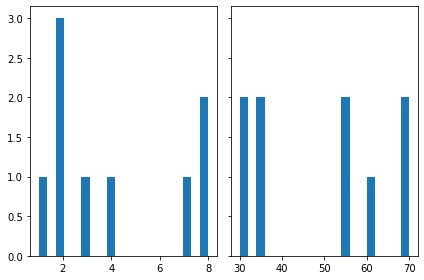

In [44]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
axs[0].hist(employee['Years'], bins=20)
axs[1].hist(employee['Salary'], bins=20)

#### What's the average salary in this company?

In [45]:
employee['Salary'].mean()

48.888888888888886

#### What's the highest salary?

In [48]:
employee['Salary'].max()

70

#### What's the lowest salary?

In [49]:
employee['Salary'].min()

30

#### Who are the employees with the lowest salary?

In [50]:
employee.loc[employee['Salary'] == 30, ['Name']]

,Name
1,Maria
2,David


#### Could you give all the information about an employee called David?

In [51]:
employee.loc[employee['Name'] == 'David',]

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [52]:
employee.loc[employee['Name'] == 'David', ['Salary']]

,Salary
2,30


#### Print all the rows where job title is associate

In [53]:
employee.loc[employee['Title'] == 'associate',]

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [54]:
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [56]:
employee.iloc[:3,]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [57]:
employee.loc[(employee['Title'] == 'associate') & (employee['Salary'] > 50),]

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [62]:
e_group = employee.groupby('Years').agg({'Name':'count', 'Salary':'mean'})
e_group.head(10)

,Name,Salary
Years,,
1,1,35.000000
2,3,38.333333
3,1,55.000000
4,1,35.000000
7,1,60.000000
8,2,70.000000


####  What is the average Salary per title?

In [64]:
e_salary = employee.groupby('Title').agg({'Name':'count', 'Salary':'mean'})
e_salary.head(10)

,Name,Salary
Title,,
VP,2,70.000000
analyst,4,32.500000
associate,3,56.666667


#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

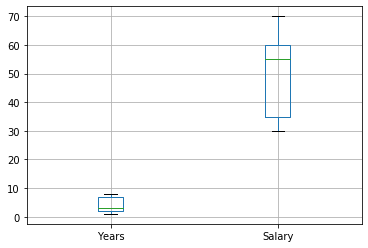

In [119]:
employee.boxplot()

In [120]:
employee.describe()

,Years,Salary
count,9.000000,9.000000
mean,4.111111,48.888889
std,2.803767,16.541194
min,1.000000,30.000000
25%,2.000000,35.000000
50%,3.000000,55.000000
75%,7.000000,60.000000
max,8.000000,70.000000


In [121]:
#1st quartile for years is 2.00 and for salary 35.00
#3rd quartile for years is 7.00 and for salary 60.00

#### Is the mean salary per gender different?

In [74]:
e_gender = employee.groupby('Gender').agg({'Name':'count','Salary':'mean'})
e_gender.head()

,Name,Salary
Gender,,
F,4,47.5
M,5,50.0


#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [78]:
#we have three departments: IT, HR, Sales
employee.loc[employee['Department'] == 'IT',].describe()
employee.loc[employee['Department'] == 'HR',].describe()
employee.loc[employee['Department'] == 'Sales',].describe()

,Years,Salary
count,2.000000,2.0
mean,2.500000,55.0
std,0.707107,0.0
min,2.000000,55.0
25%,2.250000,55.0
50%,2.500000,55.0
75%,2.750000,55.0
max,3.000000,55.0


### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [32]:
# your answer here

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [3]:
orders = pd.read_csv('Orders.zip')
orders.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [81]:
orders.dtypes

Unnamed: 0        int64
InvoiceNo         int64
StockCode        object
year              int64
month             int64
day               int64
hour              int64
Description      object
Quantity          int64
InvoiceDate      object
UnitPrice       float64
CustomerID        int64
Country          object
amount_spent    float64
dtype: object

In [82]:
orders.describe()

,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,278465.221859,560617.126645,2010.934259,7.612537,3.614555,12.728247,13.021823,3.116174,15294.315171,22.394749
std,152771.368303,13106.167695,0.247829,3.416527,1.928274,2.273535,180.420210,22.096788,1713.169877,309.055588
min,0.000000,536365.000000,2010.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12346.000000,0.000000
25%,148333.750000,549234.000000,2011.000000,5.000000,2.000000,11.000000,2.000000,1.250000,13969.000000,4.680000
50%,284907.500000,561893.000000,2011.000000,8.000000,3.000000,13.000000,6.000000,1.950000,15159.000000,11.800000
75%,410079.250000,572090.000000,2011.000000,11.000000,5.000000,14.000000,12.000000,3.750000,16795.000000,19.800000
max,541908.000000,581587.000000,2011.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,18287.000000,168469.600000


####  What is the average Purchase Price?

In [83]:
orders['UnitPrice'].mean()

3.1161744805540756

#### What were the highest and lowest purchase prices? 

In [85]:
orders['UnitPrice'].max()

8142.75

In [86]:
orders['UnitPrice'].min()

0.0

#### Select all the customers we have in Spain

In [88]:
o_es = orders.loc[orders['Country'] == 'Spain',]
o_es.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.0
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0


#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [89]:
o_es['CustomerID'].value_counts()
#We have 30 customers in Spain

12540    478
12484    346
12539    273
17097    211
12597    206
12502    147
12556    121
12546     69
12462     62
12354     58
12550     57
12541     52
12545     50
12455     48
12421     45
12510     33
12557     33
12596     27
12417     23
12507     22
12448     22
12538     21
12544     19
12454     15
12442     12
12551     10
12547      8
12450      8
12548      5
12445      4
Name: CustomerID, dtype: int64

#### Select all the customers who have bought more than 50 items ?

In [92]:
o_cu= orders.groupby('CustomerID').agg({'Quantity':'sum'})
o_cu.loc[o_cu['Quantity'] > 50,]

,Quantity
CustomerID,
12346,74215
12347,2458
12348,2341
12349,631
12350,197
...,...
18278,66
18281,54
18282,103


#### Select orders from Spain that are above 50 items

In [93]:
orders.loc[(orders['Country'] == 'Spain') & (orders['Quantity'] > 50), ['InvoiceNo']]

,InvoiceNo
4250,536944
4251,536944
4252,536944
4253,536944
4254,536944
32454,540785
32455,540785
32456,540785
32457,540785
91155,547972


#### Select all free orders

In [96]:
orders.loc[orders['UnitPrice'] == 0,]

#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [4]:
orders.loc[orders['Description'].str.startswith('lunch bag')]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
93,93,536378,20725,2010,12,3,9,lunch bag red retrospot,10,2010-12-01 09:37:00,1.65,14688,United Kingdom,16.50
172,174,536385,22662,2010,12,3,9,lunch bag dolly girl design,10,2010-12-01 09:56:00,1.65,17420,United Kingdom,16.50
354,363,536401,22662,2010,12,3,11,lunch bag dolly girl design,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
359,368,536401,20725,2010,12,3,11,lunch bag red retrospot,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
360,369,536401,22382,2010,12,3,11,lunch bag spaceboy design,2,2010-12-01 11:21:00,1.65,15862,United Kingdom,3.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397465,540436,581486,23207,2011,12,5,9,lunch bag alphabet design,10,2011-12-09 09:38:00,1.65,17001,United Kingdom,16.50
397713,541695,581538,20727,2011,12,5,11,lunch bag black skull.,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397714,541696,581538,20725,2011,12,5,11,lunch bag red retrospot,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397877,541862,581581,23681,2011,12,5,12,lunch bag red vintage doily,10,2011-12-09 12:20:00,1.65,17581,United Kingdom,16.50


#### Select all orders that are made in 2011 and are 'lunch bag'  

In [ ]:
orders.loc[(orders.Description.str.startswith('lunch bag')) & (orders.year==2011)]

#### Show the frequency distribution of the amount spent in Spain.

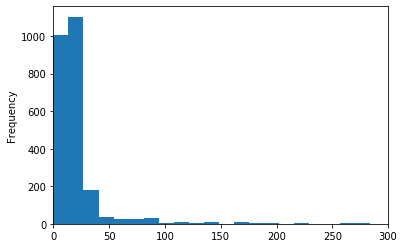

In [102]:
o_es['amount_spent'].plot(kind='hist', bins=100, xlim=(0,300))

#### Select all orders made in the month of August

In [105]:
orders.loc[orders['month'] == 8,]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
199475,285421,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20
199476,285422,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36
199477,285423,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40
199478,285424,561905,84970L,2011,8,1,9,single heart zinc t-light holder,12,2011-08-01 09:31:00,0.95,14947,United Kingdom,11.40
199479,285425,561905,84970S,2011,8,1,9,hanging heart zinc t-light holder,12,2011-08-01 09:31:00,0.85,14947,United Kingdom,10.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226483,320688,565067,22644,2011,8,3,17,ceramic cherry cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90
226484,320689,565067,22645,2011,8,3,17,ceramic heart fairy cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90
226485,320690,565067,22637,2011,8,3,17,piggy bank retrospot,2,2011-08-31 17:16:00,2.55,15856,United Kingdom,5.10
226486,320691,565067,22646,2011,8,3,17,ceramic strawberry cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [110]:
orders.loc[orders['month'] == 8, ['Country']]['Country'].value_counts()

United Kingdom     23105
Germany              795
EIRE                 593
France               569
Netherlands          280
Switzerland          267
Spain                252
Belgium              194
Israel               171
Channel Islands      140
Australia            107
Italy                 95
Austria               88
Norway                77
Finland               61
Malta                 55
Portugal              41
Sweden                40
Unspecified           23
Iceland               22
Poland                17
Denmark               16
Canada                 5
Name: Country, dtype: int64

#### What's the  average amount of money spent by country

In [115]:
o_au = orders.loc[orders['month'] == 8, ['Country','amount_spent']]
o_au.groupby('Country').agg({'amount_spent':'mean'})

,amount_spent
Country,
Australia,210.179439
Austria,17.228182
Belgium,18.319691
Canada,10.312000
Channel Islands,34.977000
Denmark,13.321875
EIRE,28.612782
Finland,22.565574
France,24.272337


#### What's the most expensive item?

In [118]:
orders['UnitPrice'].max()

8142.75

#### What was the average amount spent per year ?

In [117]:
orders.groupby('year').agg({'amount_spent':'mean'})

,amount_spent
year,
2010,21.892733
2011,22.430074
